In [77]:
#Dependencies
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mticker
# Store filepath in a variable
daily_data = "Resources/Daily_DataFrame.csv"
daily_df = pd.read_csv(daily_data, encoding="ISO-8859-1")

att_data = "Resources/Attributes_DataFrame.csv"
attributes_df = pd.read_csv(att_data, encoding="ISO-8859-1")
daily_df.head()

,Movie_Title,Date,Daily,Theaters,Rank
0,Jurassic World (2015),2015-06-12,81953950,4274.0,1
1,Jurassic World (2015),2015-06-13,69644830,4274.0,1
2,Jurassic World (2015),2015-06-14,57207490,4274.0,1
3,Jurassic World (2015),2015-06-15,25344820,4274.0,1
4,Jurassic World (2015),2015-06-16,24342515,4274.0,1


In [78]:
daily_groupby = daily_df.groupby(["Movie_Title"]).agg({"Daily":'sum'})
daily_groupby

,Daily
Movie_Title,
10 Cloverfield Lane (2016),72082998
"10,000 BC (2008)",94784201
102 Dalmatians (2000),55405132
12 Rounds (2009),12092888
12 Strong (2018),45500164
...,...
Zootopia (2016),341268248
xXx (2002),141134203
xXx: Return of Xander Cage (2017),44898413


In [140]:
merge_df = attributes_df.merge(daily_groupby, how='outer',left_on='Title', right_on='Movie_Title')
#merge_df["Domestic"]=merge_df["Domestic"].map(lambda x: (x/1000000))
#merge_df["International"]=merge_df["International"].map(lambda x: (x/1000000))
#merge_df["Budget"]=merge_df["Budget"].map(lambda x: (x/1000000))
#merge_df["Daily"]=merge_df["Daily"].map(lambda x: (x/1000000))
merge_df.describe()

,Domestic,International,Budget,Runtime,Daily
count,3.400000e+03,3.400000e+03,2.307000e+03,3400.000000,3.400000e+03
mean,5.801689e+07,7.743812e+07,5.462343e+07,108.614118,5.670272e+07
std,7.947072e+07,1.441039e+08,5.122184e+07,18.921865,7.933274e+07
min,1.535040e+05,2.360000e+02,1.500000e+04,39.000000,2.600000e+02
25%,1.206687e+07,5.850726e+06,2.000000e+07,95.750000,1.076988e+07
50%,3.213123e+07,2.532640e+07,3.600000e+07,106.000000,3.114926e+07
75%,6.971220e+07,7.948170e+07,7.500000e+07,118.000000,6.727259e+07
max,9.366622e+08,1.993811e+09,3.560000e+08,252.000000,9.356441e+08


In [141]:
#Create dataframe to classify data by Genre of the movie

# Condense the list to top 10 genres
genre_df = merge_df.groupby(["Genres"]).agg({"Domestic":'sum',"International":'sum',"Budget":'sum'}).sort_values(by=["International","Domestic","Budget"],ascending = False).reset_index().head(10)

##Format amounts to millions for easier interpretation of statastics
genre_df["Domestic(M)"]=(genre_df["Domestic"]/1000000)
genre_df["International(M)"]=(genre_df["International"]/1000000)
genre_df["Budget(M)"]=(genre_df["Budget"]/1000000)

genre_df

,Genres,Domestic,International,Budget,Domestic(M),International(M),Budget(M)
0,Action;Adventure;Sci-Fi,14591017717,24041016495,9.449000e+09,14591.017717,24041.016495,9449.00
1,Adventure;Animation;Comedy;Family;Fantasy,6609759211,11694269406,4.070300e+09,6609.759211,11694.269406,4070.30
2,Action;Adventure;Thriller,3751937269,9310960382,3.306470e+09,3751.937269,9310.960382,3306.47
3,Action;Adventure;Fantasy;Sci-Fi,4962197605,8691753251,2.972200e+09,4962.197605,8691.753251,2972.20
4,Action;Adventure;Sci-Fi;Thriller,4237792897,7555373343,3.720000e+09,4237.792897,7555.373343,3720.00
5,Action;Adventure;Fantasy,2864635950,6261254094,3.122000e+09,2864.635950,6261.254094,3122.00
6,Adventure;Family;Fantasy,2309575492,5092730473,2.375000e+09,2309.575492,5092.730473,2375.00
7,Comedy;Romance,6162792127,4897253909,2.991000e+09,6162.792127,4897.253909,2991.00
8,Comedy;Drama;Romance,5385509523,4818630199,2.625200e+09,5385.509523,4818.630199,2625.20
9,Comedy,6394890894,4539665904,2.920600e+09,6394.890894,4539.665904,2920.60


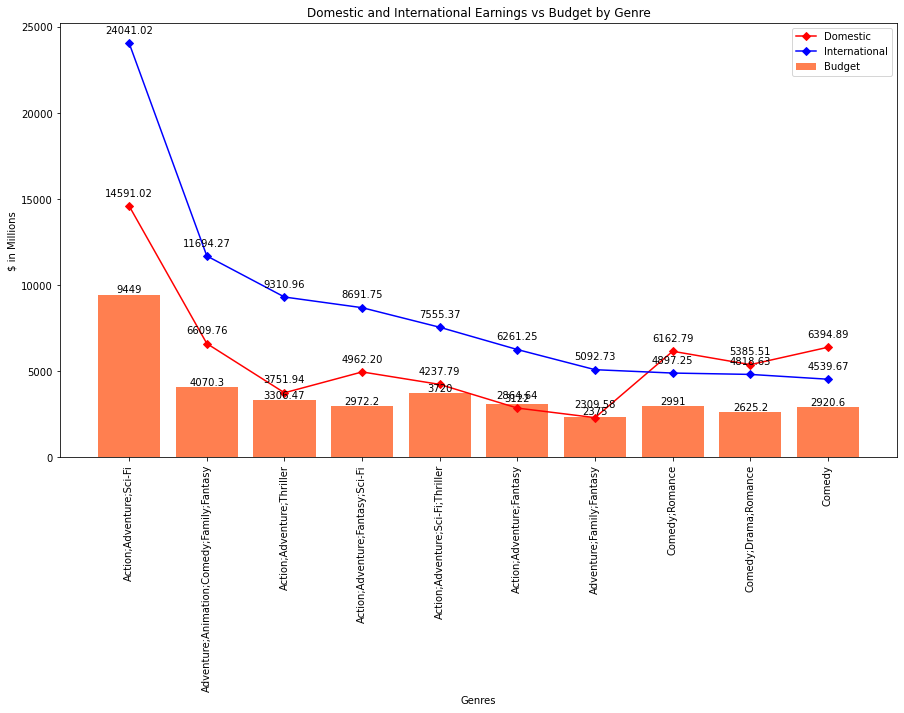

<Figure size 432x288 with 0 Axes>

In [142]:
#Create a chart showing budget in bars and domestic and international earnings on line by Genre

fig = plt.figure(figsize=(15,8))
chart1 = plt.subplot(1,1,1)


#Create Bar Chart
chart1.bar(genre_df["Genres"], genre_df["Budget(M)"],color = "coral")

#Create data value labels for bars
chart1.bar_label(chart1.containers[0])

#chart2 = chart1.twinx() -- not used in this code but for future reference t

#plot line for domestic earnings
chart1.plot(genre_df["Genres"],genre_df["Domestic(M)"], color = "red", marker='D')


#Create data value labels for domestic earnings
for x,y in zip(genre_df["Genres"],genre_df["Domestic(M)"]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
                                           

#plot line for International earnings        
chart1.plot(genre_df["Genres"],genre_df["International(M)"],color = "blue", marker='D')


#Create data value labels for domestic earnings
for x,y in zip(genre_df["Genres"],genre_df["International(M)"]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


#Format Y-Axis
plt.yticks(np.arange(0, 30000, 5000))

#Use this code to avoid fixed locator warning for X Axis
x_axis = np.arange(len(genre_df["Genres"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, genre_df["Genres"])


#Format X-Axis
chart1.set_xticklabels(labels=genre_df["Genres"],rotation=90)

#Format Chart
chart1.set_xlabel("Genres")
chart1.set_ylabel("$ in Millions")
plt.title("Domestic and International Earnings vs Budget by Genre")
plt.legend(["Domestic", "International","Budget"], loc= 'best')

 
#Show the chart
plt.show()
plt.tight_layout()

In [143]:
#Create dataframe to classify data by Distributor of the movie

#Condense the list to top 10
distr_df = merge_df.groupby(["Distributor"]).agg({"Domestic":'sum',"International":'sum',"Budget":'sum'}).sort_values(by=["International","Domestic","Budget"],ascending = False).reset_index().head(10)

#Format amounts to millions for easier interpretation
distr_df["Domestic(M)"]=(distr_df["Domestic"]/1000000)
distr_df["International(M)"]=(distr_df["International"]/1000000)
distr_df["Budget(M)"]=(distr_df["Budget"]/1000000)

distr_df

,Distributor,Domestic,International,Budget,Domestic(M),International(M),Budget(M)
0,Walt Disney Studios Motion Pictures,34307590708,48916040418,1.920600e+10,34307.590708,48916.040418,19206.000
1,Warner Bros.,30960105191,43090669239,2.103888e+10,30960.105191,43090.669239,21038.877
2,Twentieth Century Fox,22029863936,34537108914,1.580930e+10,22029.863936,34537.108914,15809.300
3,Universal Pictures,24480306891,32206607721,1.637830e+10,24480.306891,32206.607721,16378.300
4,Sony Pictures Entertainment (SPE),18635353436,25879868666,1.386960e+10,18635.353436,25879.868666,13869.600
5,Paramount Pictures,15346726495,18420429577,1.198366e+10,15346.726495,18420.429577,11983.665
6,Lionsgate,9262151842,10147069008,4.637700e+09,9262.151842,10147.069008,4637.700
7,DreamWorks,4725255683,6946526705,3.176000e+09,4725.255683,6946.526705,3176.000
8,New Line Cinema,4037843690,4029106366,2.182000e+09,4037.843690,4029.106366,2182.000
9,DreamWorks Distribution,3341355632,3624138230,2.128700e+09,3341.355632,3624.138230,2128.700


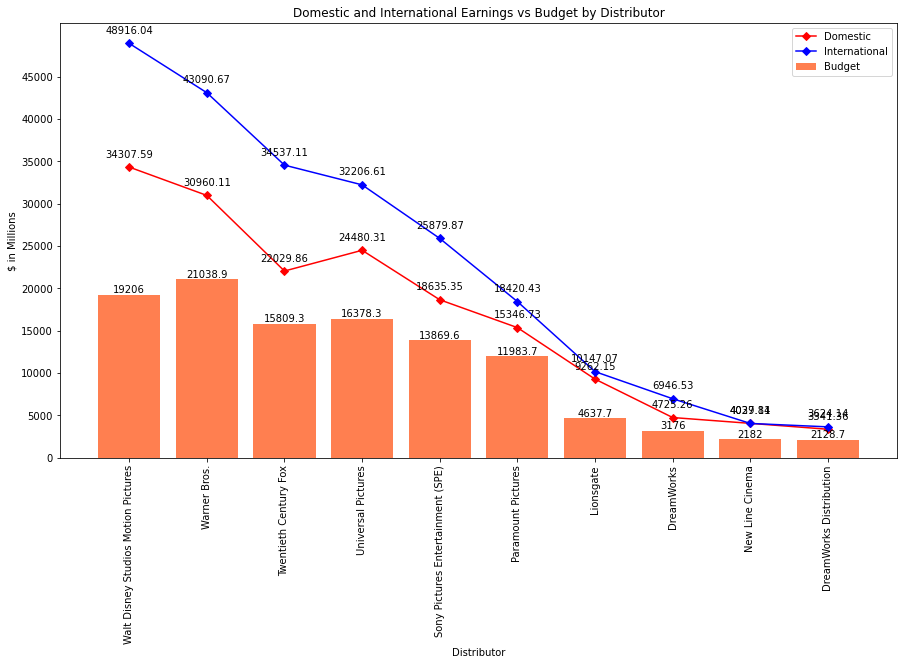

<Figure size 432x288 with 0 Axes>

In [144]:
#Create a chart showing budget in bars and domestic and international earnings on line by Distributor

fig = plt.figure(figsize=(15,8))
chart2 = plt.subplot(1,1,1)


#Create Bar Chart
chart2.bar(distr_df["Distributor"], distr_df["Budget(M)"],color = "coral",label="Budget")

#Create data value labels for bars
chart2.bar_label(chart2.containers[0])

#chart2 = chart1.twinx() -- not used in this code but for future reference t

#plot line for domestic earnings
chart2.plot(distr_df["Distributor"],distr_df["Domestic(M)"], color = "red", marker='D',label="Domestic(M)")


#Create data value labels for domestic earnings
for x,y in zip(distr_df["Distributor"],distr_df["Domestic(M)"]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
                                           

#plot line for International earnings        
chart2.plot(distr_df["Distributor"],distr_df["International(M)"],color = "blue", marker='D',label="International(M)")


#Create data value labels for domestic earnings
for x,y in zip(distr_df["Distributor"],distr_df["International(M)"]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


#Format Y-Axis
plt.yticks(np.arange(0, 50000, 5000))

#Use this code to avoid fixed locator warning for X Axis
x_axis = np.arange(len(distr_df["Distributor"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, distr_df["Distributor"])


#Format X-Axis
chart2.set_xticklabels(labels=distr_df["Distributor"],rotation=90)

#Format Chart
chart2.set_xlabel("Distributor")
chart2.set_ylabel("$ in Millions")
plt.title("Domestic and International Earnings vs Budget by Distributor")

plt.legend(["Domestic", "International","Budget"], loc= 'best')

            

#Show the chart
plt.show()
plt.tight_layout()

In [145]:
#Create dataframe to classify data by Rating of the movie

#Condense the list to top 10
rtng_df = merge_df.groupby(["MPAA-Rating"]).agg({"Domestic":'sum',"International":'sum',"Budget":'sum'}).sort_values(by=["International","Domestic","Budget"],ascending = False).reset_index().head(10)

#Format amounts to millions for easier interpretation
rtng_df["Domestic(M)"]=(rtng_df["Domestic"]/1000000)
rtng_df["International(M)"]=(rtng_df["International"]/1000000)
rtng_df["Budget(M)"]=(rtng_df["Budget"]/1000000)

rtng_df

,MPAA-Rating,Domestic,International,Budget,Domestic(M),International(M),Budget(M)
0,PG-13,98433967831,135732122855,6.510126e+10,98433.967831,135732.122855,65101.265
1,PG,42576939188,59210990956,2.657908e+10,42576.939188,59210.990956,26579.077
2,R,47909443057,53298754061,2.949762e+10,47909.443057,53298.754061,29497.615
3,G,3244345421,4469070317,1.833000e+09,3244.345421,4469.070317,1833.000
4,Not Rated,5700885,45472132,0.000000e+00,5.700885,45.472132,0.000
5,NC-17,5211842,35138995,5.000000e+06,5.211842,35.138995,5.000


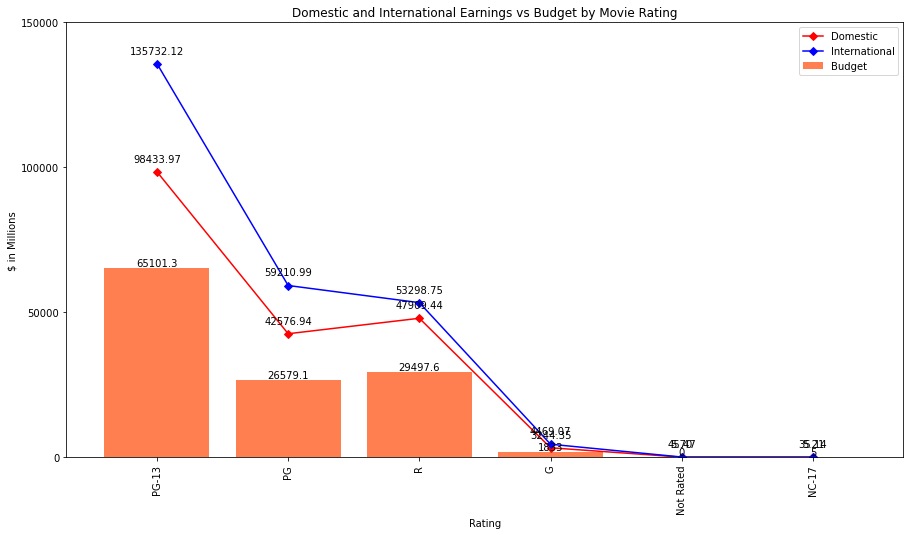

<Figure size 432x288 with 0 Axes>

In [146]:
#Create a chart showing budget in bars and domestic and international earnings on line by Movie Rating

fig = plt.figure(figsize=(15,8))
chart3 = plt.subplot(1,1,1)


#Create Bar Chart
chart3.bar(rtng_df["MPAA-Rating"], rtng_df["Budget(M)"],color = "coral",label="Budget")

#Create data value labels for bars
chart3.bar_label(chart3.containers[0])

#chart2 = chart1.twinx() -- not used in this code but for future reference t

#plot line for domestic earnings
chart3.plot(rtng_df["MPAA-Rating"],rtng_df["Domestic(M)"], color = "red", marker='D',label="Domestic(M)")


#Create data value labels for domestic earnings
for x,y in zip(rtng_df["MPAA-Rating"],rtng_df["Domestic(M)"]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
                                           

#plot line for International earnings        
chart3.plot(rtng_df["MPAA-Rating"],rtng_df["International(M)"],color = "blue", marker='D',label="International(M)")


#Create data value labels for domestic earnings
for x,y in zip(rtng_df["MPAA-Rating"],rtng_df["International(M)"]):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


#Format Y-Axis
plt.yticks(np.arange(0, 160000, 50000))

#Use this code to avoid fixed locator warning for X Axis
x_axis = np.arange(len(rtng_df["MPAA-Rating"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rtng_df["MPAA-Rating"])


#Format X-Axis
chart3.set_xticklabels(labels=rtng_df["MPAA-Rating"],rotation=90)

#Format Chart
chart3.set_xlabel("Rating")
chart3.set_ylabel("$ in Millions")
plt.title("Domestic and International Earnings vs Budget by Movie Rating")

plt.legend(["Domestic", "International","Budget"], loc= 'best')

            

#Show the chart
plt.show()
plt.tight_layout()

Summary of conclusions : Domestic vs International Earnings

All numbers in $M

Statstics:

Average Statastics:($M)
    Domestic: $58.016887
    International: $77.438118
    Budget: $54.623432

Minimum Statastics: ($M)
    Domestic: $0.153504
    International: $0.000236
    Budget: $0.015000
    
Maximum Statastics: ($M)
    Domestic: $936.662225
    International: $1993.811448
    Budget: $356.000000
    
By Genre:

Highest Grossing Genre is "Action;Adventure;Sci-Fi" with $24,041M International Earning,	$14,591M Domestic Earnings and $9,449M Total Budget

By Distributor:

Highest Grossing Distributor is "Walt Disney Studios Motion Pictures" with $48,916M International Earning,	$34,307M Domestic Earnings and $19,206M Total Budget


By Movie Rating:

Highest Grossing Movie Rating is "PG-13" with $135,732M International Earning,	$98,433M Domestic Earnings and $65,101M Total Budget

